# Minimum Working Solution DL Engima 1.0

#### This notebook was inspired from [here](https://www.kaggle.com/code/sameen53/yolov8-minimum-working-sample)

In [ ]:
# basic libraries ...

import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [5]:
# ultrlytics ...

!pip install ultralytics -q

In [6]:
# yolo ...

from ultralytics import YOLO

In [7]:
# delete all the files and directories recursively in the current working directory ...

!rm -rf *

# make directory ...

!mkdir /kaggle/working/datasets
!mkdir /kaggle/working/datasets/badodd
!mkdir /kaggle/working/datasets/badodd/labels
!mkdir /kaggle/working/datasets/badodd/labels/train
!mkdir /kaggle/working/datasets/badodd/images
!mkdir /kaggle/working/datasets/badodd/images/train
!mkdir /kaggle/working/datasets/badodd/images/test

In [8]:
#  reference original files without duplicating their content ...

def all_files_in_folder_symlink(source_dir, target_dir):
    files = os.listdir(source_dir)
    
    for file in tqdm(files):
        source_file = os.path.join(source_dir, file)
        target_file = os.path.join(target_dir, file)
        os.symlink(source_file, target_file)

In [9]:
# symbolic link function as above ...

all_files_in_folder_symlink("/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/labels/train","/kaggle/working/datasets/badodd/labels/train")
all_files_in_folder_symlink("/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/train","/kaggle/working/datasets/badodd/images/train")
all_files_in_folder_symlink("/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/test","/kaggle/working/datasets/badodd/images/test")

100%|██████████| 1964/1964 [00:00<00:00, 27362.76it/s]


In [10]:
# configuration file that tells YOLO where to find the dataset and what objects to detect ...

file_content = """
path: /kaggle/working/datasets/badodd  # dataset root dir
train: images/train  # train images (relative to 'path')
val: images/train  # val images (relative to 'path')
test:  images/test

# Classes
names:
    0: auto_rickshaw
    1: bicycle
    2: bus
    3: car
    4: cart_vehicle
    5: construction_vehicle
    6: motorbike
    7: person
    8: priority_vehicle
    9: three_wheeler
    10: train
    11: truck
    12: wheelchair
"""

with open("/kaggle/working/yolov8.yaml", mode="w") as f:
    f.write(file_content)

In [8]:
# import wandb
# wandb.login(key="9b71ed3001172396cf4c14f47917c10390f93ab3")

# from ultralytics import YOLO

# # Load a COCO-pretrained RT-DETR-l model
# model = YOLO('yolov5x.pt')
# model = ('/kaggle/input/dummy-nasiat/yolov7-e6.pt')

# # Train the model with 2 GPUs
# model.train(data='/kaggle/working/yolov8.yaml', epochs=3, imgsz=640,batch =8 ,device='0,1',cache=True, val = False)

In [11]:
!pip install ensemble-boxes

In [12]:
from ensemble_boxes import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0it [00:00, ?it/s]

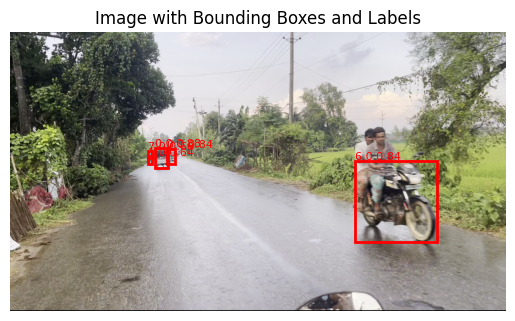

1it [00:02,  2.24s/it]

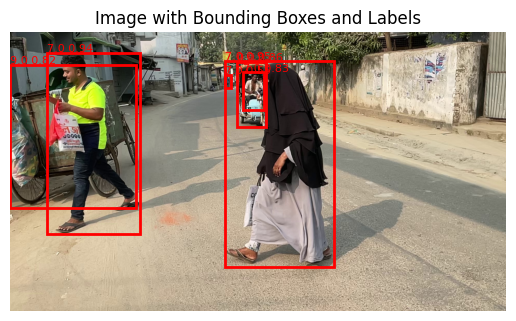

/opt/conda/lib/python3.10/site-packages/ensemble_boxes/ensemble_boxes_wbf.py:42: UserWarning: X1 < 0 in box. Set it to 0.
  warnings.warn('X1 < 0 in box. Set it to 0.')
2it [00:02,  1.33s/it]

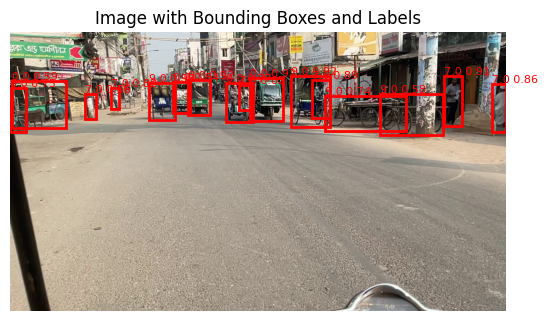

3it [00:03,  1.06s/it]

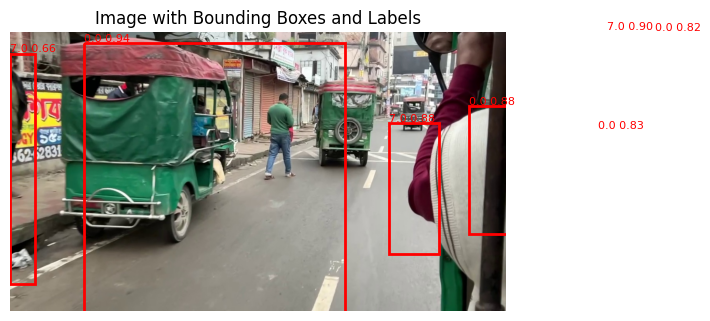

/opt/conda/lib/python3.10/site-packages/ensemble_boxes/ensemble_boxes_wbf.py:54: UserWarning: Y1 < 0 in box. Set it to 0.
  warnings.warn('Y1 < 0 in box. Set it to 0.')
4it [00:04,  1.17it/s]

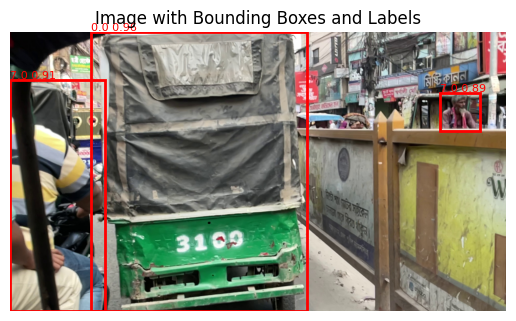

5it [00:04,  1.24it/s]

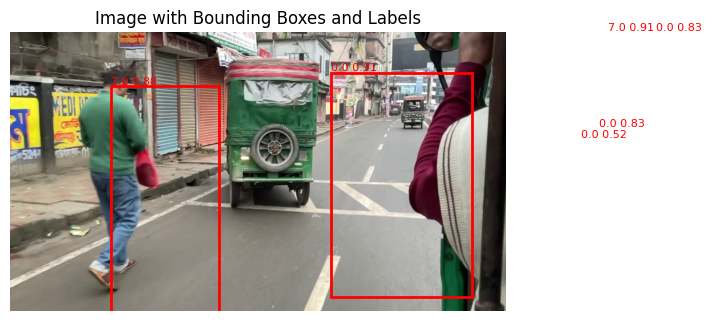

6it [00:05,  1.40it/s]

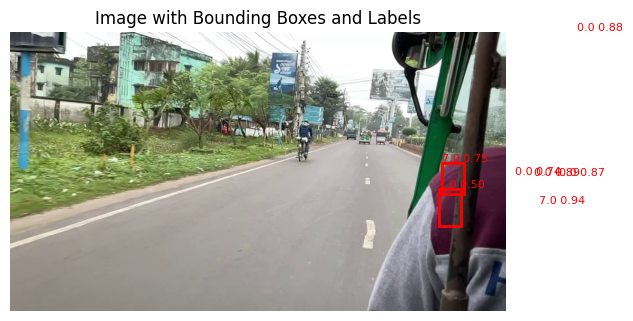

7it [00:05,  1.54it/s]

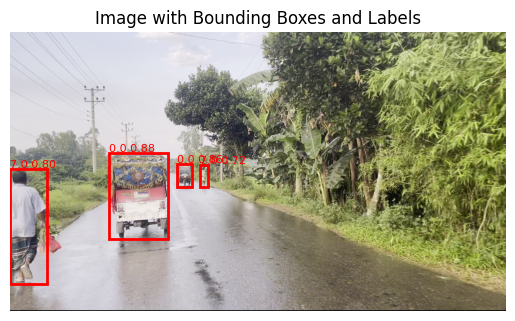

8it [00:06,  1.57it/s]

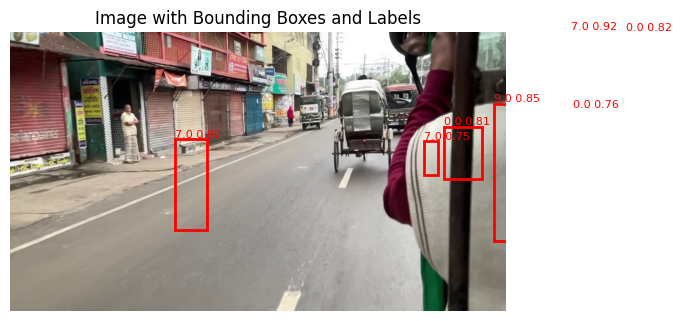

9it [00:07,  1.73it/s]

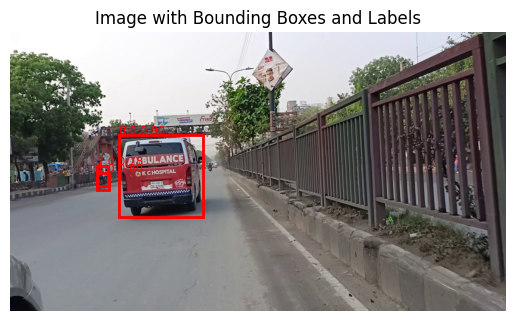

10it [00:07,  1.64it/s]

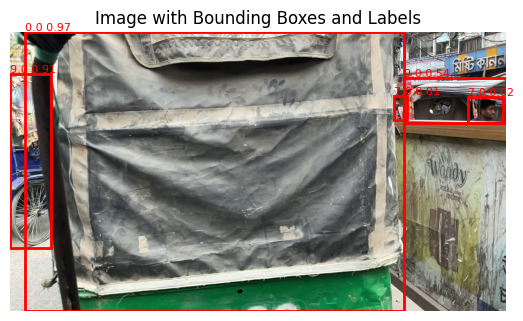

11it [00:08,  1.57it/s]

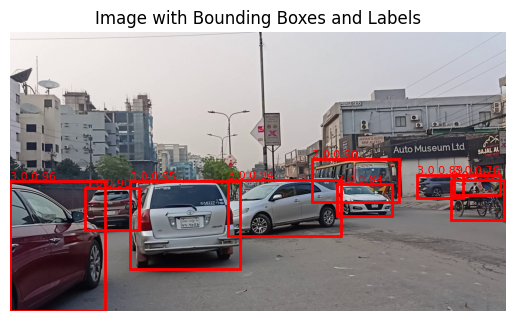

12it [00:09,  1.52it/s]

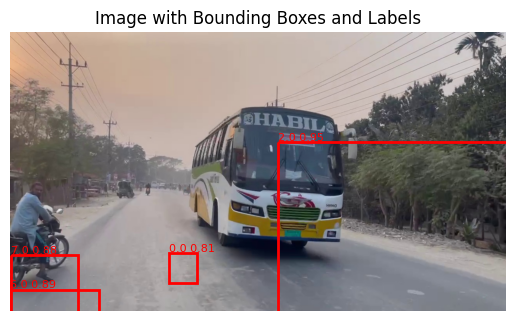

13it [00:09,  1.70it/s]

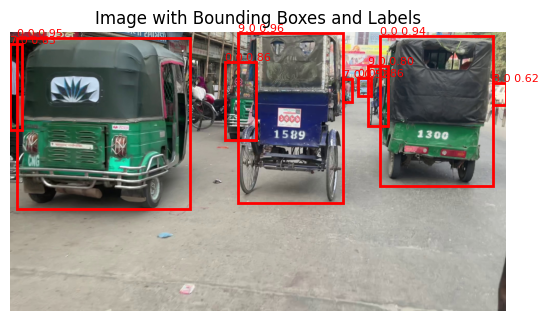

14it [00:10,  1.67it/s]

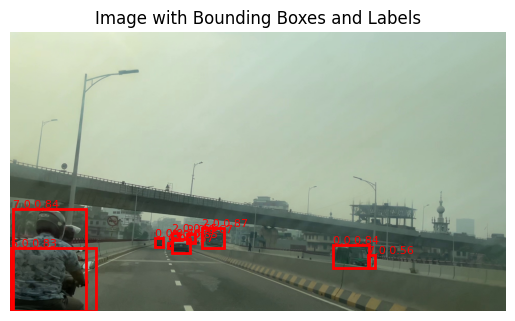

15it [00:10,  1.66it/s]

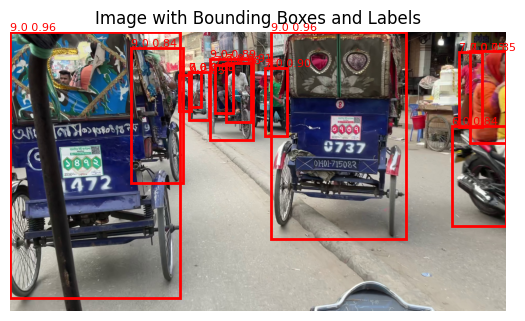

16it [00:11,  1.55it/s]

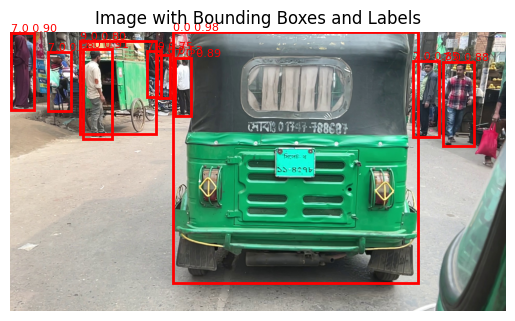

17it [00:12,  1.49it/s]

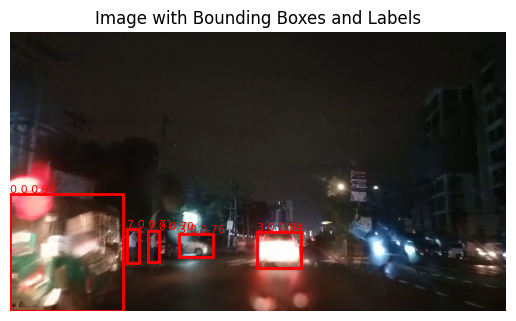

18it [00:12,  1.49it/s]

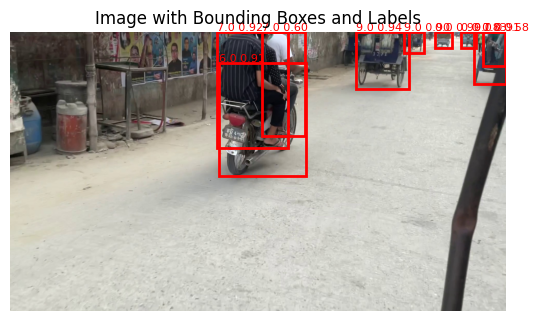

19it [00:13,  1.48it/s]

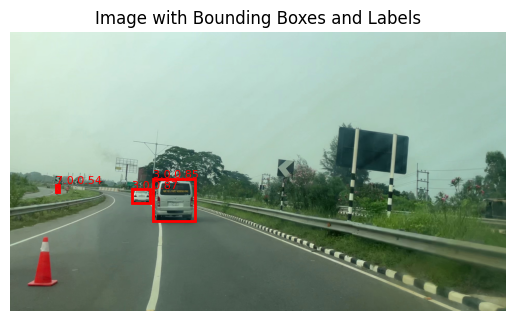

20it [00:14,  1.50it/s]

In [ ]:
# get prediction boxes string according to the submission format ...
iou_thr=0.55
skip_box_thr=0.0001
weights=[2,1]
from ultralytics import YOLO
from ultralytics import RTDETR
def get_prediction_string(boxes, scores, classes):
    pred_strs = []
    for i, score in enumerate(scores):
        single_pred_str = ""
        single_pred_str += str(float(classes[i])) + " " + str(float(score)) + " "
        
        x1 , y1, x2, y2 = boxes[i]
        x1 = float(x1)
        y1 = float(y1)
        width = float(x2)-float(x1)
        height = float(y2)-float(y1)
        #single_pred_str += " ".join(str(float(x)) for x in boxes[i])
        single_pred_str +=  f"{x1} {y1} {width} {height}"
        
        pred_strs.append(single_pred_str)
    ans = ','.join(map(str, pred_strs))
    if len(ans):
        return ans
#     the solution metrics faield in case of a NaN, '' (empty). So, return "0 0 0 0 0 0" for NaN, '' (empty) string
    return "0 0 0 0 0 0"

# get the predcition in id, ImageID, PredictionString_pred foramt ...

def get_prediction_entry(i, filename, boxes, scores, classes):
    return {
        "id": i, # strating from 0 ...
        "ImageID": filename.split('.')[0], # before the extension ...
        "PredictionString_pred": get_prediction_string(boxes, scores, classes)
    }

# Directory path ...
test_directory = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/test"

# Load the model ...
model1 = RTDETR('/kaggle/input/modelw/best.pt')
model2 = YOLO('/kaggle/input/modelw/best(14).pt')

# do the inference ...

def predict_all_files(test_directory):
    predictions = []
    for i,filename in tqdm(enumerate(os.listdir(test_directory))):
        if filename.endswith(".jpg"):
            filepath = os.path.join(test_directory, filename)
            results = model1.predict(source=filepath, conf=0.50, verbose=False)
            boxes=[]
            scores=[]
            classes=[]
            boxes.append(get_boxes(boxes = results[0].boxes.xywhn.cpu().numpy()))
            scores.append(results[0].boxes.conf.cpu().numpy())
            classes.append(results[0].boxes.cls.cpu().numpy())
            showim_xywhn(filepath,boxes[0],classes[0],scores[0])
            results = model2.predict(source=filepath, conf=0.50, verbose=False)
            boxes.append(get_boxes(boxes = results[0].boxes.xywhn.cpu().numpy()))
            scores.append(results[0].boxes.conf.cpu().numpy())
            classes.append(results[0].boxes.cls.cpu().numpy())
            boxes, scores, classes = weighted_boxes_fusion(boxes, scores, classes, weights=weights, iou_thr=iou_thr, skip_box_thr=skip_box_thr)
            prediction = get_prediction_entry(i, filename, boxes, scores, classes)
            predictions.append(prediction)
#             to csv format ...
    predictions_df = pd.DataFrame(predictions)
    predictions_df.to_csv("submission.csv", index=False)

# call the inference function ...
predict_all_files(test_directory)

In [16]:
# load the submission dataframe ....

submission_df = pd.read_csv('/kaggle/working/submission.csv')

In [17]:
# preview ...

submission_df.tail()

id                       ImageID  \
1959  1959             mymensingh1_90013   
1960  1960  chittagong_bohoddarhat2_8673   
1961  1961                 sylhet1_32475   
1962  1962       chittagong_night1_12840   
1963  1963    chuadanga_sirajganj1_10320   

                                  PredictionString_pred  
1959  0.0 0.9431884288787842 -0.08024540543556213 0....  
1960  0.0 0.8549220561981201 -0.18376094102859497 -0...  
1961  0.0 0.963075578212738 -0.06975758075714111 0.0...  
1962  3.0 0.8727864027023315 -0.029543831944465637 -...  
1963  11.0 0.917259693145752 0.004324734210968018 -0...

In [13]:
from PIL import Image
filepath = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/train/chittagong_bohoddarhat1_10502.jpg"
img = Image.open(filepath) 
  
# get width and height 
width = img.width 
height = img.height 
  
# display width and height 
print("The height of the image is: ", height) 
print("The width of the image is: ", width) 

The height of the image is:  1080
The width of the image is:  1920


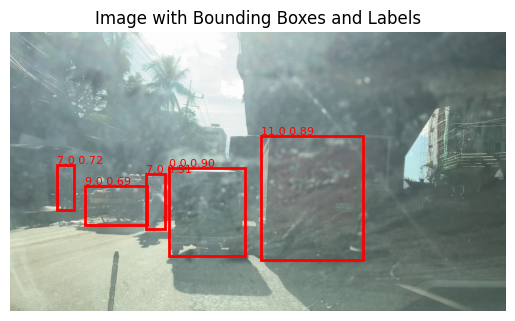

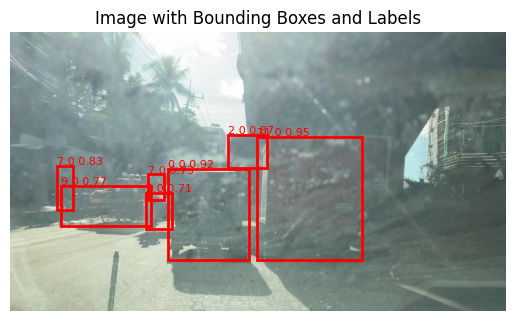

[[0.3210579454898834, 0.48547007143497467, 0.4740695655345917, 0.803518995642662], [0.5051364228129387, 0.37218964099884033, 0.7112111523747444, 0.8160625696182251], [0.09420075081288815, 0.4773504212498665, 0.12821857072412968, 0.6367450281977654], [0.15039318799972534, 0.5529762580990791, 0.2754824459552765, 0.6923644468188286], [0.2733773849904537, 0.5091379806399345, 0.3117680884897709, 0.7044109180569649]]
[0.4974762499332428, 0.37529534101486206, 0.7086853682994843, 0.8162979483604431]
[          0          11           7           9           7]
[         11           0           2           7           9           7           9]
[    0.50313       0.373     0.71055     0.81612]
[         11           0           7           2           9           7           9]


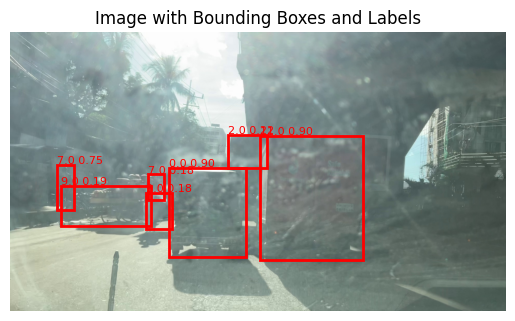

In [25]:
iou_thr=0.55
skip_box_thr=0.7
weights=[3,1]
import numpy
from ultralytics import YOLO
from ultralytics import RTDETR
model1 = RTDETR('/kaggle/input/modelw/best.pt')
model2 = YOLO('/kaggle/input/modelw/best(14).pt')
filepath = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/train/chittagong_bohoddarhat1_13806.jpg"
results = model1.predict(source=filepath, conf=0.50, verbose=False)
boxes=[]
scores=[]
classes=[]
boxes.append(get_boxes(boxes = results[0].boxes.xywhn.cpu().numpy()))
scores.append(results[0].boxes.conf.cpu().numpy())
classes.append(results[0].boxes.cls.cpu().numpy())
showim_xywhn(filepath,boxes[0],classes[0],scores[0])
# print(results[0].boxes.data.cpu().numpy())
results = model2.predict(source=filepath, conf=0.50, verbose=False)
boxes.append(get_boxes(boxes = results[0].boxes.xywhn.cpu().numpy()))
scores.append(results[0].boxes.conf.cpu().numpy())
classes.append(results[0].boxes.cls.cpu().numpy())
showim_xywhn(filepath,boxes[1],classes[1],scores[1])
print(boxes[0])
print(boxes[1][0])
print(classes[0])
print(classes[1])
boxes, scores, classes = weighted_boxes_fusion(boxes, scores, classes, weights=weights, iou_thr=iou_thr, skip_box_thr=skip_box_thr)
print(boxes[0])
print(classes)
showim_xywhn(filepath,boxes,classes,scores)

In [11]:
def width_height(box):
#     print(box)
    x1 = box[0]*1920
    y1 = box[1]*1080
    x2 = x1 + box[2]*1920
    y2 = y1 + box[3]*1080
    return [x1,y1,x2,y2]

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def showim_xywhn(path,boxes,classes,scores):
    image = plt.imread(path)
    fig, ax = plt.subplots()
    ax.imshow(image)
    i=0
    for i in range(len(boxes)):
        x1, y1, x2, y2 = boxes[i]
        x1=x1*1920
        y1=y1*1080
        x2=x2*1920
        y2=y2*1080
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1 - 5, f"{classes[i].item()} {scores[i].item():.2f}", fontsize=8, color='red')
#     for box, clas, scor in zip(boxes, classes, scores):
#         x1, y1, x2, y2 = width_height(box[i])
#         rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
#         ax.add_patch(rect)
#         i=i+1
#         ax.text(x1, y1 - 5, f"{clas} {scor:.2f}", fontsize=8, color='red')
    plt.axis('off')  # Turn off axes for a cleaner look
    plt.title('Image with Bounding Boxes and Labels')
    plt.show()

In [69]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO

# Load the model (already done in your code)
# ...

# Run inference (already done in your code)
# ...

# Access the first result (assuming you have only one image)
first_result = results[0]

# Inspect the structure of the first result to determine how to access bounding boxes, labels, and confidence scores
print(first_result)  # Analyze the output to identify the correct attributes or methods

# Assuming you can access the data as boxes, labels, and confidences (adjust accordingly):
boxes = first_result.boxes  # Example, replace with the correct way to access boxes
labels = first_result.labels  # Example, replace with the correct way to access labels
confidences = first_result.confidences  # Example, replace with the correct way to access confidences

# Load the image
image = plt.imread('/content/chittagong_bohoddarhat1_1003.jpg')

# Create the plot
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Draw bounding boxes and labels
for box, label, conf in zip(boxes, labels, confidences):
    x1, y1, x2, y2 = box
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(x1, y1 - 5, f"{model.names[label]} {conf:.2f}", fontsize=8, color='r')

# Set title and show the plot
plt.title('Image with Bounding Boxes and Labels')
plt.show()


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

AttributeError: 'Results' object has no attribute 'labels'. See valid attributes below.

    A class for storing and manipulating inference results.

    Args:
        orig_img (numpy.ndarray): The original image as a numpy array.
        path (str): The path to the image file.
        names (dict): A dictionary of class names.
        boxes (torch.tensor, optional): A 2D tensor of bounding box coordinates for each detection.
        masks (torch.tensor, optional): A 3D tensor of detection masks, where each mask is a binary image.
        probs (torch.tensor, optional): A 1D tensor of probabilities of each class for classification task.
        keypoints (List[List[float]], optional): A list of detected keypoints for each object.

    Attributes:
        orig_img (numpy.ndarray): The original image as a numpy array.
        orig_shape (tuple): The original image shape in (height, width) format.
        boxes (Boxes, optional): A Boxes object containing the detection bounding boxes.
        masks (Masks, optional): A Masks object containing the detection masks.
        probs (Probs, optional): A Probs object containing probabilities of each class for classification task.
        keypoints (Keypoints, optional): A Keypoints object containing detected keypoints for each object.
        speed (dict): A dictionary of preprocess, inference, and postprocess speeds in milliseconds per image.
        names (dict): A dictionary of class names.
        path (str): The path to the image file.
        _keys (tuple): A tuple of attribute names for non-empty attributes.
    

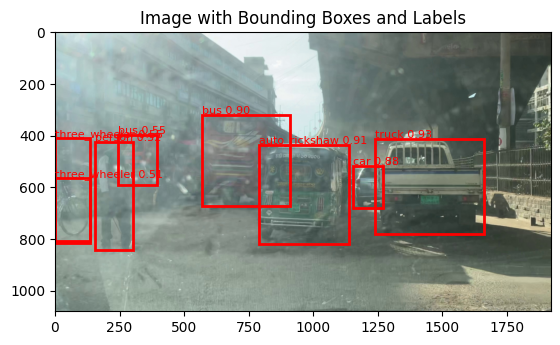

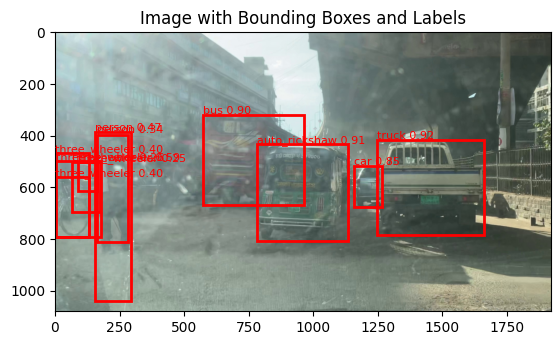

In [96]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import RTDETR
filepath = '/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/test/chittagong_bohoddarhat1_10974.jpg'
# Load the model (already done in your code)
model1 = YOLO('/kaggle/input/modelw/best(14).pt')

# Run inference (already done in your code)
# ...
results = model1.predict(source=filepath, verbose=False)
imshow(results,filepath)
model2 = RTDETR('/kaggle/input/modelw/best.pt')
results = model2.predict(source=filepath,  verbose=False)
imshow(results,filepath)

In [90]:
def imshow(results,filepath):
    # Access the first result
    first_result = results[0]

    # Access the necessary data directly using the correct attributes
    boxes = first_result.boxes.data.cpu().numpy()  # Access the boxes as a NumPy array
    labels = first_result.boxes.cls.cpu().numpy()  # Access the labels as a NumPy array
    confidences = first_result.boxes.cpu().conf.numpy()  # Access the confidence scores as a NumPy array

    # Load the image
    image = plt.imread(filepath)

    # Create the plot
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Draw bounding boxes and labels
    for box, label, conf in zip(boxes, labels, confidences):
        x1, y1, x2, y2 = box[:4]
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1 - 5, f"{model.names[label]} {conf:.2f}", fontsize=8, color='r')

    # Set title and show the plot
    plt.title('Image with Bounding Boxes and Labels')
    plt.show()

In [1]:
def get_boxes(boxes):
    box_in_img = []
    for i, score in enumerate(boxes):
        single_pred_str = ""
        
        x_center , y_center, width,height = boxes[i]
#         print(boxes[i])
        x1 = float(x_center) - (float(width) / 2)
        y1 = float(y_center) - (float(height) / 2)
        width = float(width)
        height = float(height)
        box_in_img.append([x1,y1,x1+width,y1+height])
    return box_in_img

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def imshow2(boxes,labels,confidences,filepath):
    # Load the image
    image = plt.imread(filepath)

    # Create the plot
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Draw bounding boxes and labels
    for box, label, conf in zip(boxes, labels, confidences):
        x1, y1, x2, y2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1 - 5, f"{label} {conf:.2f}", fontsize=8, color='r')

    # Set title and show the plot
    plt.title('Image with Bounding Boxes and Labels')
    plt.show()

In [34]:
from ensemble_boxes import *

boxes_list = [[
    [0.00, 0.51, 0.81, 0.91],
    [0.10, 0.31, 0.71, 0.61],
    [0.01, 0.32, 0.83, 0.93],
    [0.02, 0.53, 0.11, 0.94],
    [0.03, 0.24, 0.12, 0.35],
],[
    [0.04, 0.56, 0.84, 0.92],
    [0.12, 0.33, 0.72, 0.64],
    [0.38, 0.66, 0.79, 0.95],
    [0.08, 0.49, 0.21, 0.89],
]]
scores_list = [[0.9, 0.8, 0.2, 0.4, 0.7], [0.5, 0.8, 0.7, 0.3]]
labels_list = [[0, 1, 0, 1, 1], [1, 1, 1, 0]]
weights = [2, 1]

iou_thr = 0.5
skip_box_thr = 0.0001
boxes, scores, labels = weighted_boxes_fusion(boxes_list, scores_list, labels_list, weights=weights, iou_thr=iou_thr, skip_box_thr=skip_box_thr)
print(boxes)
print(labels)

[[    0.10667     0.31667     0.71333        0.62]
 [  0.0018182     0.47545     0.81364     0.91364]
 [       0.03        0.24        0.12        0.35]
 [       0.02        0.53        0.11        0.94]
 [       0.38        0.66        0.79        0.95]
 [       0.04        0.56        0.84        0.92]
 [       0.08        0.49        0.21        0.89]]
[          1           0           1           1           1           1           0]
